0    306.964844
1    311.021484
2    311.412109
3    310.243164
4    311.813965
dtype: float64 0    306.960938
1    305.710938
2    303.328857
3    300.734863
4    301.623840
dtype: float64
dedup: 0
0    307.539062
1    311.869141
2    310.333008
3    312.308594
4    313.227783
dtype: float64 0    307.535156
1    266.406250
2    241.974854
3    232.176392
4    226.825256
dtype: float64
dedup: 1


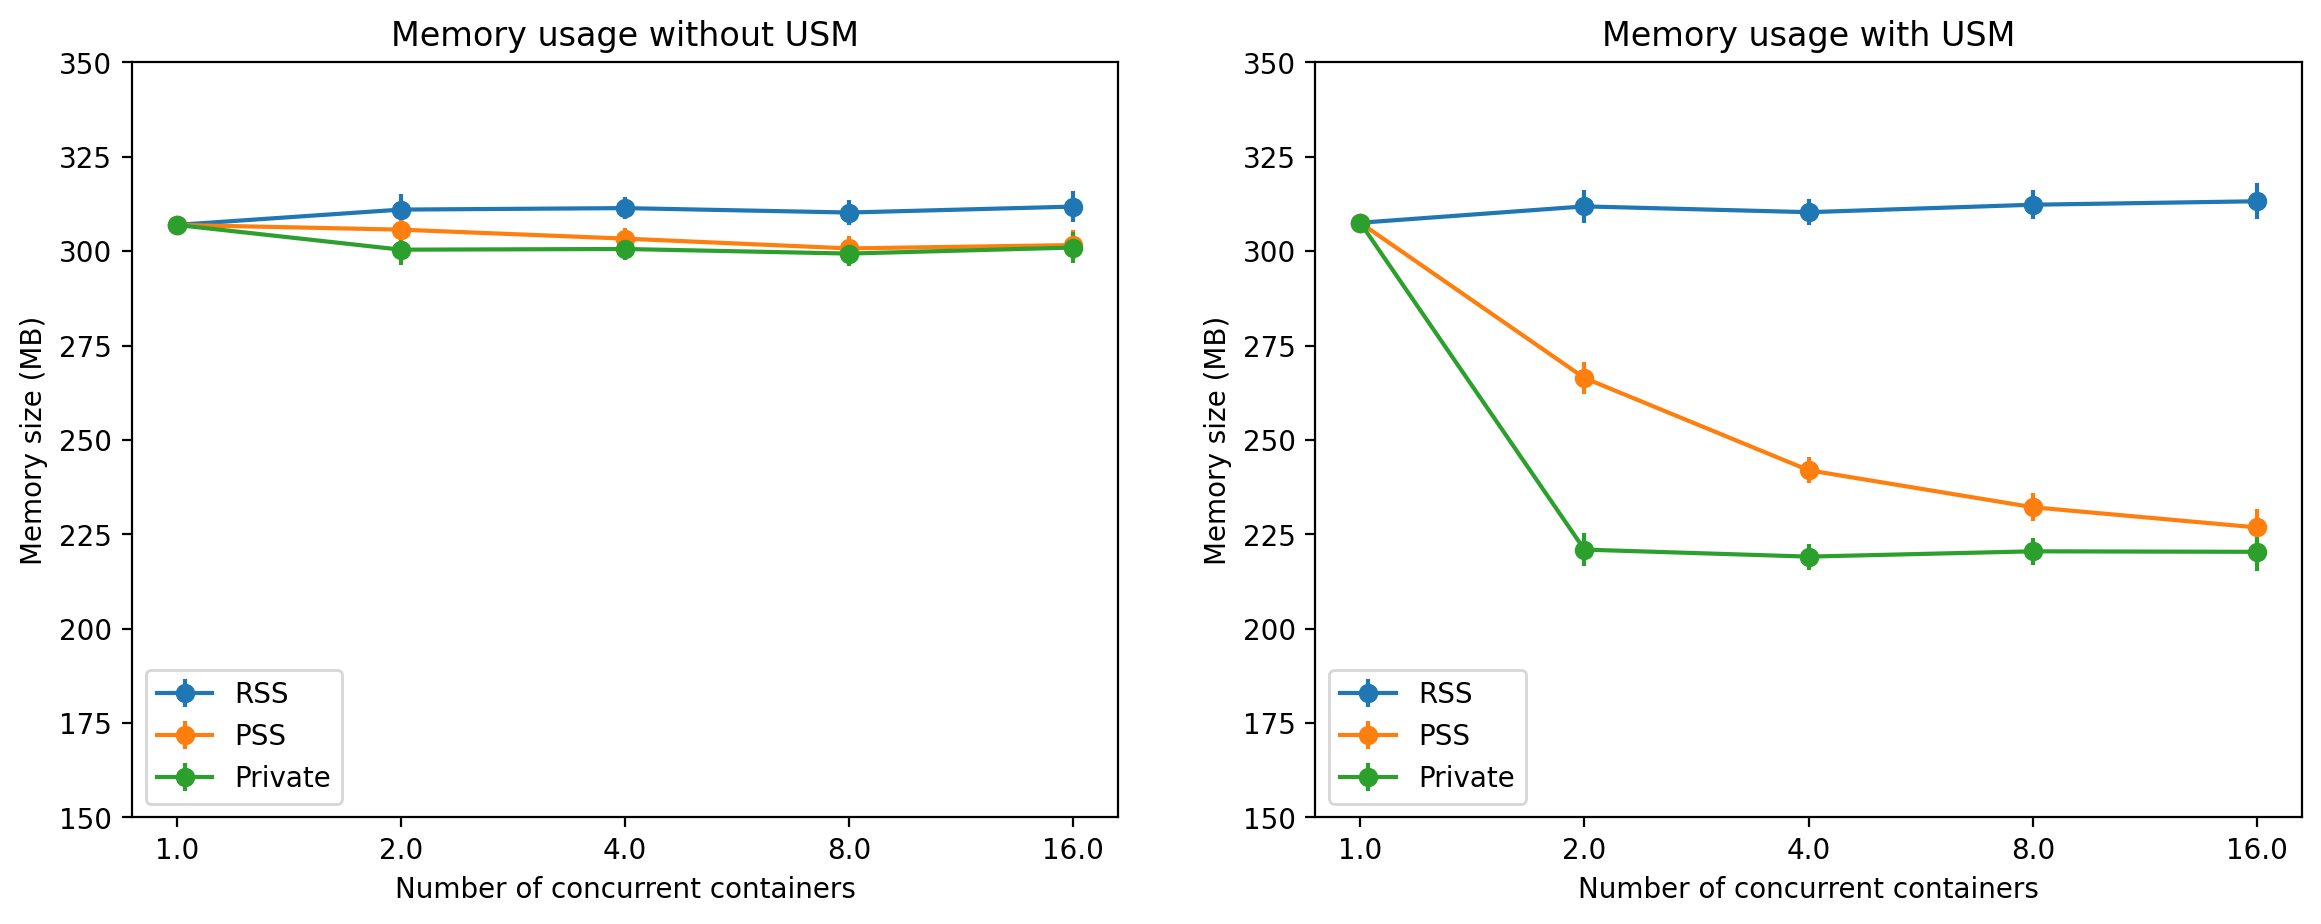

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math

# benchmark = sys.argv[1]
# num = sys.argv[2]
# dedup = sys.argv[3]
benchmark = "411.image-recognition"
num = 16
dedup = 0

# if dedup == 1:
#     data_dir = os.path.join("/data", benchmark + "/", "concurrent_containers_dedupon")
# else:
#     data_dir = os.path.join("/data", benchmark + "/", "concurrent_containers_dedupoff")
data_dir = os.path.join("/data", benchmark + "/", "concurrent_containers_dedupoff")

n = math.log(int(num),2)
n = int(n)
x_axis = np.logspace(0,n,n+1,base=2)

data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

print(data_rss_avg, data_pss_avg)

x = np.arange(1,n+2)
# print(x)

plt.subplot(1,2,1)
# plt.rcParams['figure.dpi'] = 500
plt.rcParams["figure.figsize"] = (10,3)
plt.errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
plt.errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
plt.errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
plt.title("Memory usage without USM")
plt.xlabel('Number of concurrent containers')
plt.ylabel('Memory size (MB)')
plt.ylim(ymin=150, ymax=350)
plt.xticks(x, x_axis)
plt.legend(loc="lower left")
print("dedup:", dedup)
# if dedup == 1:
#     print("saving to concurrent_dedup.jpg")
#     plt.savefig(os.path.join(data_dir + "/", "concurrent_dedup.jpg"))
# else:
#     print("saving to concurrent.jpg")
#     plt.savefig(os.path.join(data_dir + "/", "concurrent.jpg"))



dedup = 1
data_dir = os.path.join("/data", benchmark + "/", "concurrent_containers_dedupon")
n = math.log(int(num),2)
n = int(n)
x_axis = np.logspace(0,n,n+1,base=2)

data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

print(data_rss_avg, data_pss_avg)

x = np.arange(1,n+2)
# print(x)

plt.subplot(1,2,2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,5)
plt.errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
plt.errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
plt.errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
plt.title("Memory usage with USM")
plt.xlabel('Number of concurrent containers')
plt.ylabel('Memory size (MB)')
plt.ylim(ymin=150, ymax=350)
plt.xticks(x, x_axis)
plt.legend(loc="lower left")
print("dedup:", dedup)

# plt.savefig(os.path.join(data_dir + "/", "two_together_concurrent.jpg"))